In [1]:
#importing libraries
%matplotlib inline
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import csv
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from random import random, seed
import seaborn as sns

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## https://www.kaggle.com/henriqueyamahata/bank-marketing




###   Data Dictionary
- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',            'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
             'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

- A Consumer Price Index measures changes in the price level of a weighted average market basket of consumer goods and services purchased by households.
- Consumer Confidence Index:  It measures consumers' levels of optimism regarding current economic conditions.
- y - has the client subscribed a term deposit? (binary: 'yes', 'no')
- The Euro Interbank Offered Rate (Euribor) is a daily reference rate, published by the European Money Markets Institute, based on the averaged interest rates at which Eurozone banks offer to lend unsecured funds

In [2]:
#importing a baning dataset from kaggle, using the lenk below
#https://www.kaggle.com/henriqueyamahata/bank-marketing
banking = pd.read_csv('bank-additional-full.csv', sep = ';')
#Getting to know the data
print(banking.head(3))

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  

[3 rows x 21 columns]


In [3]:
banking_new = banking.loc[:, ['age', 'month', 'marital' , 'education', 'y']]

In [4]:
le = LabelEncoder()
banking_new['status'] = le.fit_transform(banking['y'])

In [5]:
banking_new.drop('y', axis = 1, inplace = True)

In [6]:
banking_new = banking_new[(banking_new.marital == 'married')|(banking_new.marital == 'single')]

In [7]:
print(banking_new.shape)

(36496, 5)


In [8]:
print(banking_new.describe(include = 'all'))

                 age  month  marital          education        status
count   36496.000000  36496    36496              36496  36496.000000
unique           NaN     10        2                  8           NaN
top              NaN    may  married  university.degree           NaN
freq             NaN  12248    24928              10800           NaN
mean       39.407415    NaN      NaN                NaN      0.113766
std        10.230551    NaN      NaN                NaN      0.317531
min        17.000000    NaN      NaN                NaN      0.000000
25%        32.000000    NaN      NaN                NaN      0.000000
50%        37.000000    NaN      NaN                NaN      0.000000
75%        46.000000    NaN      NaN                NaN      0.000000
max        98.000000    NaN      NaN                NaN      1.000000


(array([0.00037425, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00037425]),
 array([11568., 12904., 14240., 15576., 16912., 18248., 19584., 20920.,
        22256., 23592., 24928.]),
 <a list of 10 Patch objects>)

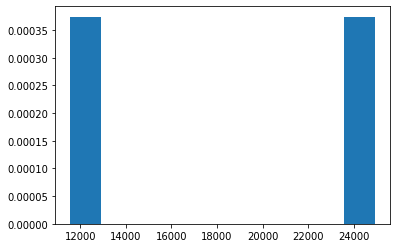

In [9]:
plt.hist(banking_new['marital'].value_counts(), density = True)

In [10]:
banking['cons.conf.idx'].head()
# A month-on-month decreasing trend suggests consumers have a negative outlook on their ability to 
#secure and retain good jobs. Thus, manufacturers may expect consumers to avoid retail purchases, 
#particularly large-ticket items that require financing.

0   -36.4
1   -36.4
2   -36.4
3   -36.4
4   -36.4
Name: cons.conf.idx, dtype: float64

In [11]:
banking['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

In [12]:
numeric_df = banking.select_dtypes(include =['int', 'float'])
corr = numeric_df.corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text yticklabel objects>)

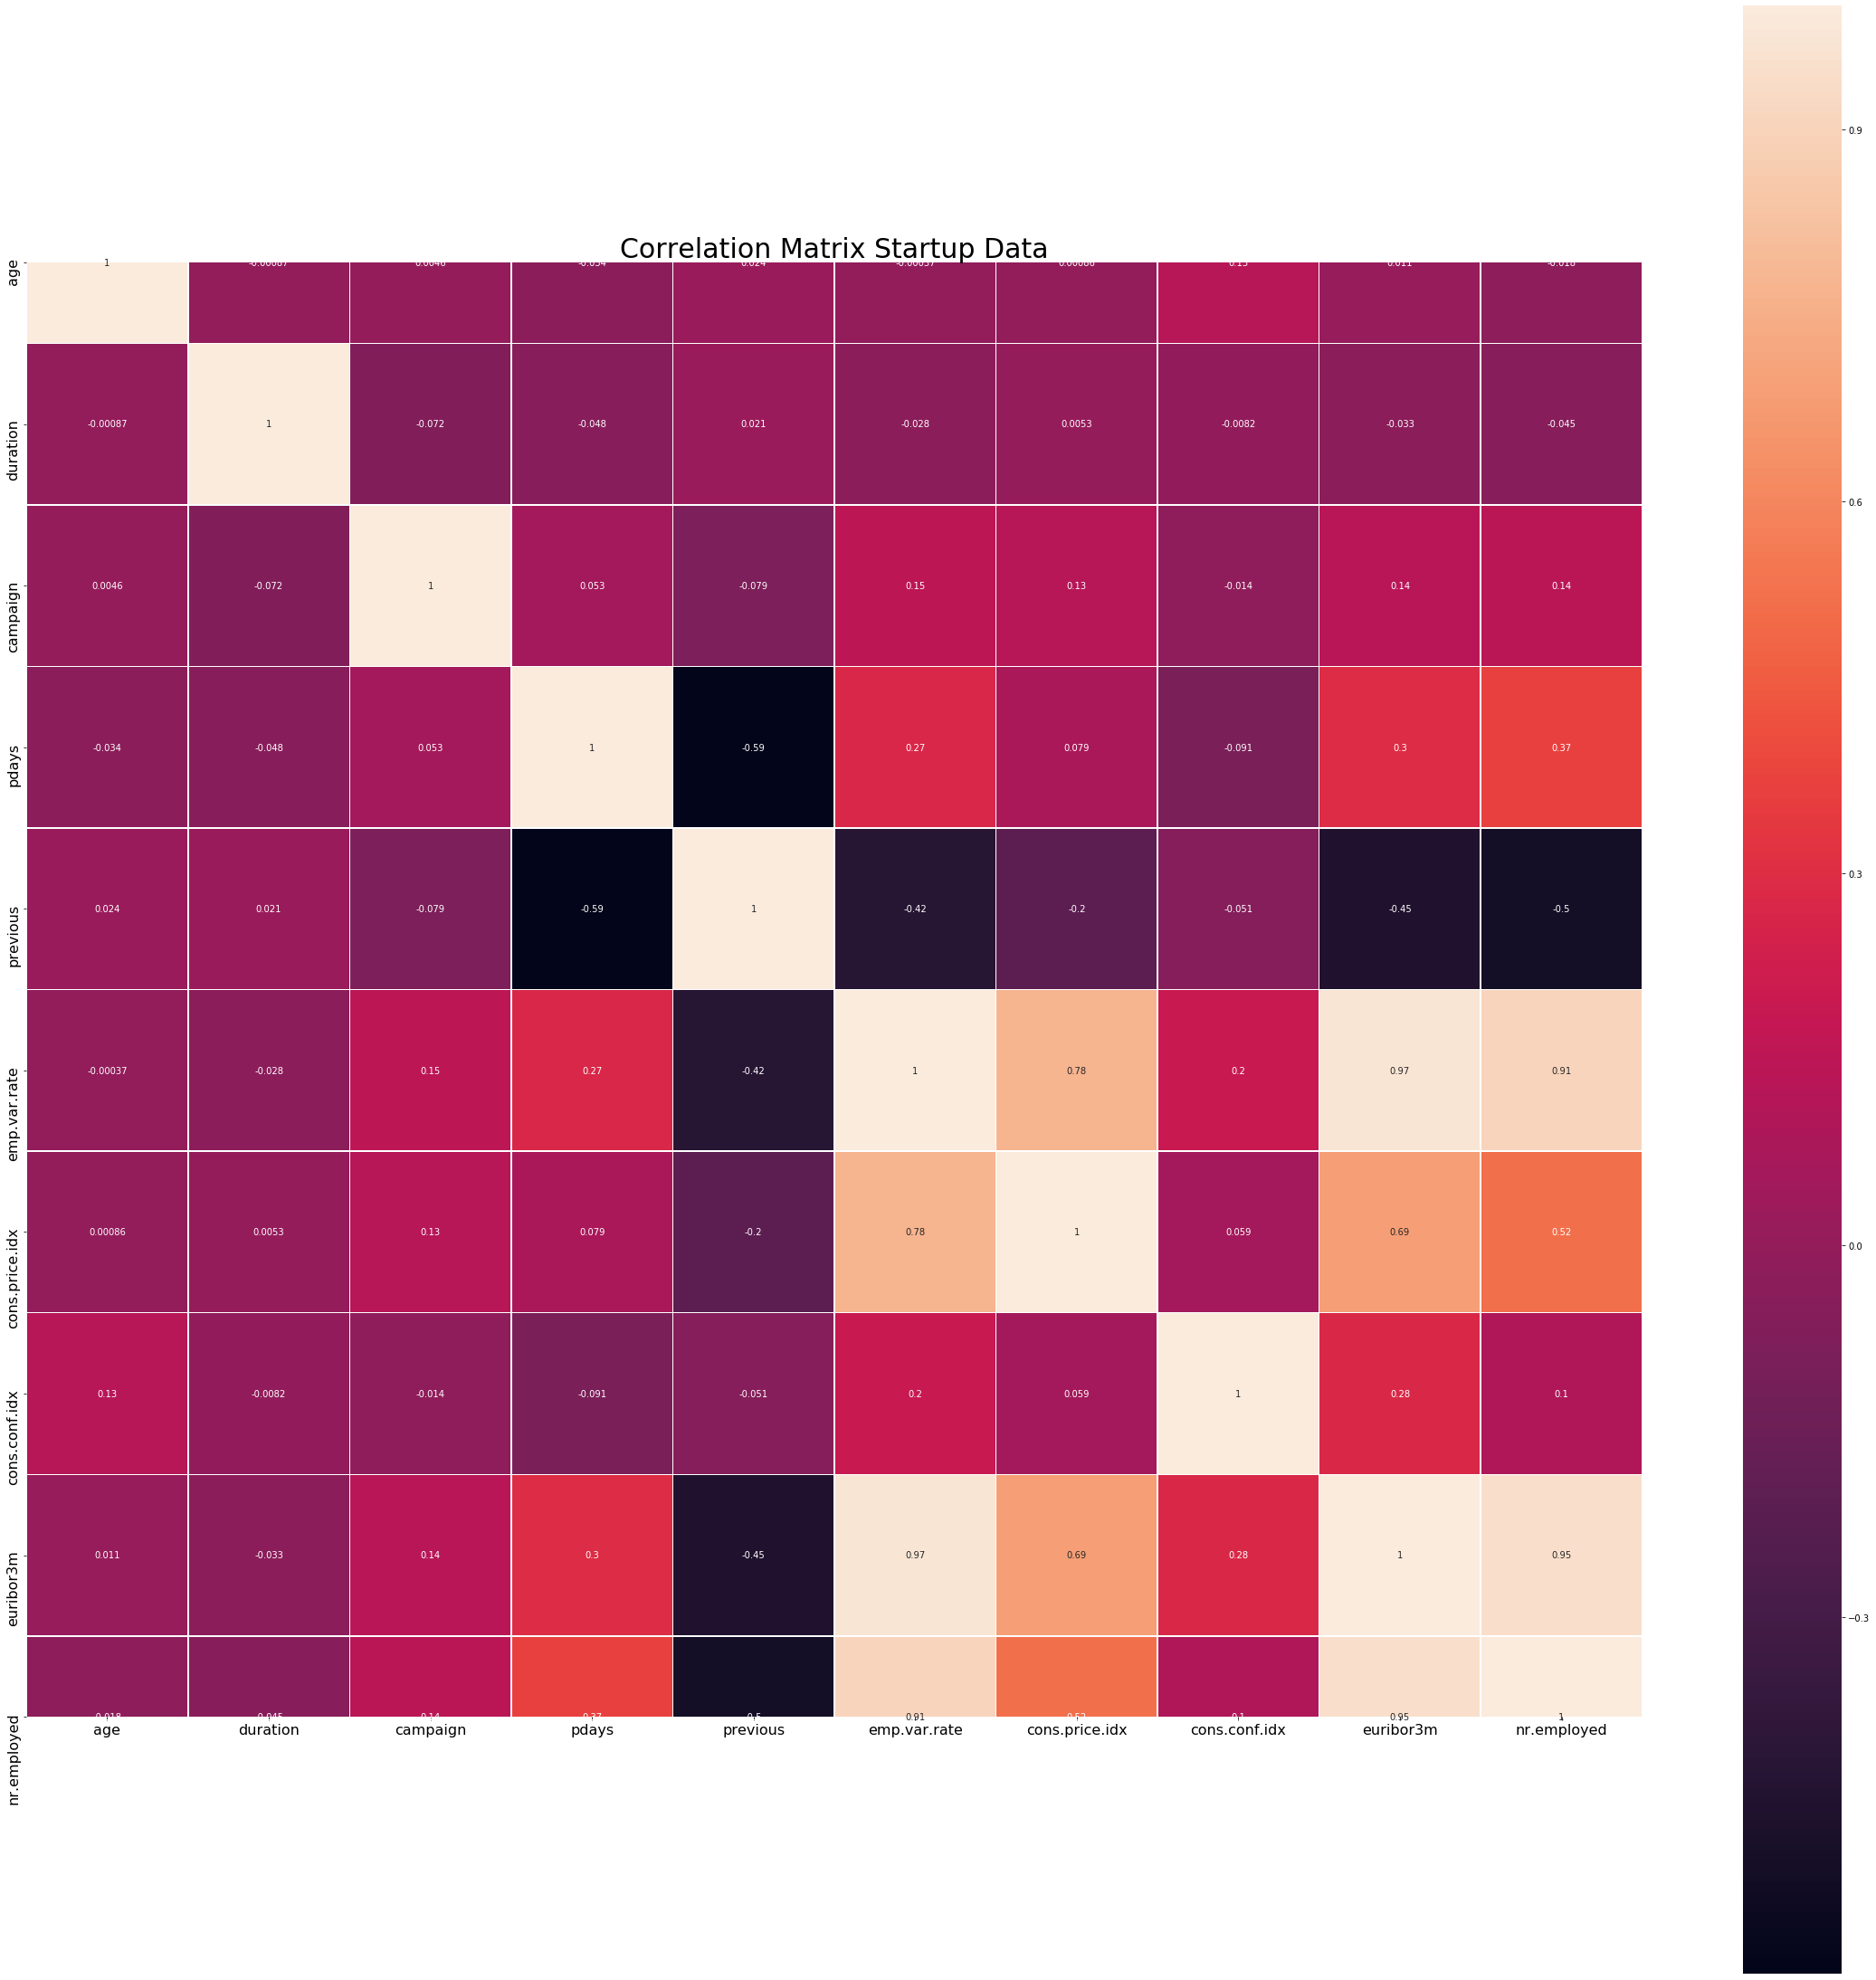

In [13]:
# Heatmap for closer look into correlation
plt.figure(figsize = (40,40))
sns.heatmap(corr, square = True, annot = True, linewidths = 0.5)
plt.title("Correlation Matrix Startup Data", fontsize = 30)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

In [14]:
le = LabelEncoder()
y_status = le.fit_transform(banking['y'])
banking['y_status'] = y_status

In [15]:
marital_df = banking[(banking.marital == 'married')| (banking.marital == 'single')]

In [16]:
marital_df.pivot_table(values = 'y_status', index = 'marital', columns = 'month')

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
marital,,,,,,,,,,
married,0.183201,0.100199,0.526316,0.087386,0.089254,0.452991,0.058492,0.088305,0.453634,0.429003
single,0.253102,0.118612,0.448980,0.096901,0.158009,0.530120,0.080611,0.126214,0.445783,0.481481


In [17]:
married_df = marital_df[marital_df.marital == 'married']
single_df = marital_df[marital_df.marital == 'single']

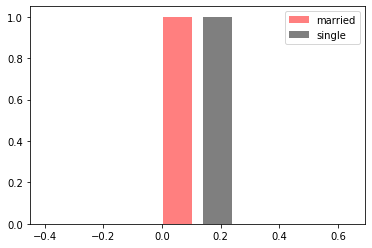

In [95]:
plt.hist(married_df['y_status'].mean(), label = 'married', alpha = 0.5, color = 'red')
plt.hist(single_df['y_status'].mean(), label = 'single', alpha = 0.5, color = 'black')
plt.legend(loc = 'best')
plt.show()

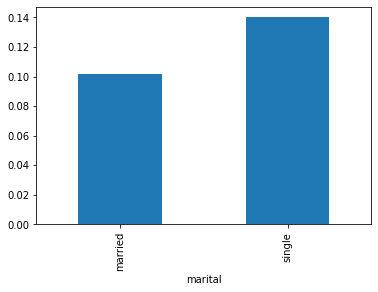

In [108]:
marital_df.groupby('marital')['y_status'].mean().plot(kind='bar')

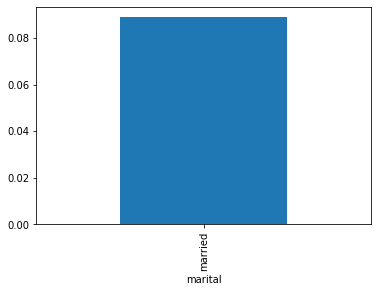

In [111]:
married_summer.groupby('marital')['y_status'].mean().plot(kind='bar')

In [113]:
data = [['married', 0.09], ['single', 0.12]]

In [116]:
df = pd.DataFrame(data, columns = ['marital', 'y_status'])

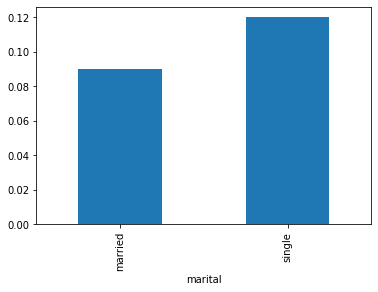

In [118]:
df.groupby('marital')['y_status'].mean().plot(kind='bar')

In [119]:
data1 = [['married', 0.1520], ['single', 0.2287]]
df1 = pd.DataFrame(data1, columns = ['marital', 'y_status'])

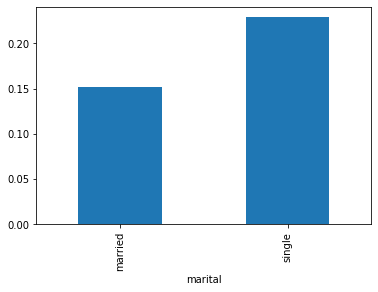

In [120]:
df1.groupby('marital')['y_status'].mean().plot(kind='bar')

In [20]:
single_df['y_status'].mean()


0.1400414937759336

In [21]:
married_summer = married_df[(married_df.month == 'may')|(married_df.month == 'june')|
                            (married_df.month == 'july')|(married_df.month == 'august')|
                           (married_df.month == 'sep')|(married_df.month == 'oct')]

single_summer =  single_df[(single_df.month == 'may')|(single_df.month == 'june')|
                            (single_df.month == 'july')|(single_df.month == 'august')|
                           (single_df.month == 'sep')|(single_df.month == 'oct')]

In [22]:
married_winter = married_df[(married_df.month == 'nov')|(married_df.month == 'dec')|
                            (married_df.month == 'jan')|(married_df.month == 'feb')|
                           (married_df.month == 'mar')|(married_df.month == 'apr')]

single_winter =  single_df[(single_df.month == 'nov')|(single_df.month == 'dec')|
                            (single_df.month == 'jan')|(single_df.month == 'feb')|
                           (single_df.month == 'mar')|(single_df.month == 'apr')]

In [23]:
print("The Average Subscription rate of Single in Summer: {:.4f}".format(single_summer['y_status'].mean())
)
print("The Average Subscription rate of Married in Summer: {:.4f}".format(married_summer['y_status'].mean()))


The Average Subscription rate of Single in Summer: 0.1206
The Average Subscription rate of Married in Summer: 0.0888


In [24]:
ttest_summer = stats.ttest_ind(married_summer['y_status'], single_summer['y_status'])

In [25]:
print("The pvalue of one tailed ttest is {:.4f}".format(ttest_summer.pvalue/2))

The pvalue of one tailed ttest is 0.0000


[[Text(0, 0, 'Single'), Text(0, 0, 'Married')]]

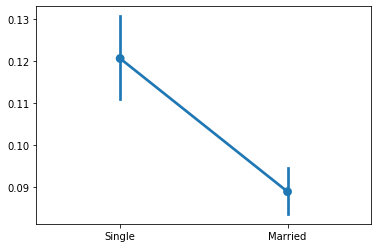

In [26]:
g_summer = sns.pointplot(data=[single_summer['y_status'],
                        married_summer['y_status']], join=True)
                        
g_summer.set(xticklabels = ['Single', 'Married'])

In [27]:
print("The Average Subscription rate of Single in Winter: {:.4f}".format(single_winter['y_status'].mean()))
print("The Average Subscription rate of Married in Winter: {:.4f}".format(married_winter['y_status'].mean()))

The Average Subscription rate of Single in Winter: 0.2287
The Average Subscription rate of Married in Winter: 0.1520


In [28]:
ttest_winter = stats.ttest_ind(married_winter['y_status'], single_winter['y_status'])

In [29]:
print("The pvalue of one tailed ttest is {:.4f}".format(ttest_winter.pvalue/2))

The pvalue of one tailed ttest is 0.0000


[[Text(0, 0, 'Single'), Text(0, 0, 'Married')]]

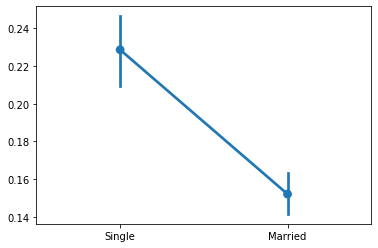

In [30]:
g_winter = sns.pointplot(data=[single_winter['y_status'],
                        married_winter['y_status']], join=True)
                        
g_winter.set(xticklabels = ['Single', 'Married'])

#### It appears that the mean subscription rate is higher in singles in most of months except July, August and October

In [31]:
#Lets compare the groups between the ages of 30 and 50 only
marital_age = marital_df[(marital_df.age >= 30) & (marital_df.age <=50)]

In [99]:
married_age = married_df[(married_df.age >= 30) & (married_df.age <= 50)]
single_age = single_df[(single_df.age >= 30) & (single_df.age <= 50)]

In [100]:
print("The Average Subscription rate of Single between age 30-50: {:.4f}".format(single_age['y_status'].mean())
)
print("The Average Subscription rate of Married between age 30-50: {:.4f}".format(married_age['y_status'].mean()))


The Average Subscription rate of Single between age 30-50: 0.1126
The Average Subscription rate of Married between age 30-50: 0.0862


[[Text(0, 0, 'Single'), Text(0, 0, 'Married')]]

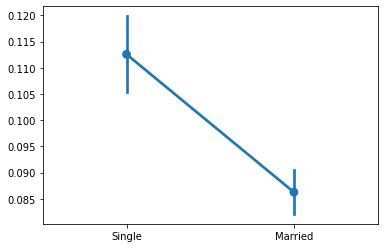

In [101]:
g_age = sns.pointplot(data=[single_age['y_status'],
                        married_age['y_status']], join=True)
                        
g_age.set(xticklabels = ['Single', 'Married'])

In [102]:
ttest_age = stats.ttest_ind(single_uni['y_status'], married_uni['y_status'])

In [105]:
print("The pvalue of one tailed ttest is: {:.4f}".format(ttest_age.pvalue/2))

The pvalue of one tailed ttest is: 0.0244


In [32]:
marital_age.pivot_table(values = 'y_status', index = 'marital', columns = 'month')

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
marital,,,,,,,,,,
married,0.143506,0.084648,0.5,0.079511,0.079151,0.483871,0.052591,0.069681,0.504902,0.456522
single,0.206452,0.088650,0.5,0.080972,0.122699,0.542373,0.073150,0.089133,0.441667,0.476744


#### Single and Married groups have equal subscription rates in months of August, December and slightly higher in July, May, November, September. We can see that singles have higher subscription rate in April, June, March and October between the ages of 30 and 50.  

#### Subscription rates are different for few months when compared between the ages of 30 and 50. For Example the subscription rates in October for all ages was almost same but the subscription rates for singles increased significantly in October between ages 30 and 50

university.degree      7808
high.school            5572
basic.9y               3757
professional.course    3294
basic.4y               2135
basic.6y               1665
unknown                 901
illiterate                7
Name: education, dtype: int64


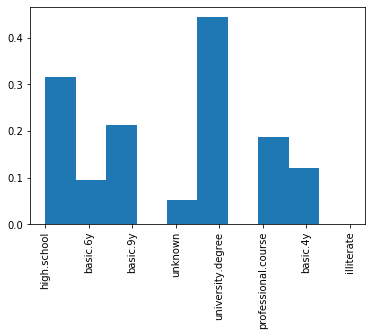

In [33]:
plt.hist(marital_age.education, density = True)
plt.xticks(rotation = 90)
print(marital_age['education'].value_counts())

In [34]:
##df.loc[(df.Event == 'Dance'),'Event']='Hip-Hop'
##df['Event'] = np.where((df.Event == 'Painting'),'Art',df.Event)

In [35]:
marital_age['education'] = np.where((marital_age['education'] == 'basic.9y'), 'basic.6y', marital_age.education)

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
marital_age['education'] = np.where((marital_age['education'] == 'basic.6y'), 'basic.4y', marital_age.education)

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

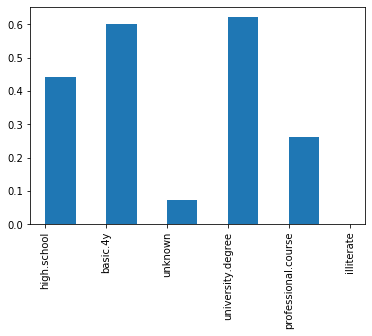

In [37]:
plt.hist(marital_age.education, density = True)
plt.xticks(rotation = 90)

In [38]:
bank_yes = banking[(banking.y_status == 1)]

(array([ 476.,    0.,    0., 2532.,    0.,    0., 1620.,    0.,    0.,
          12.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

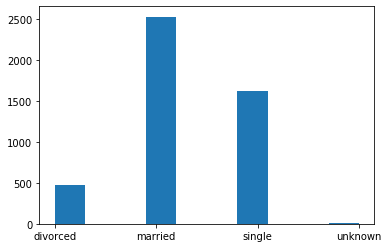

In [39]:
plt.hist(bank_yes['marital'])

In [40]:
marital_age.pivot_table(values = 'y_status', index = 'marital', columns = 'education')

education,basic.4y,high.school,illiterate,professional.course,university.degree,unknown
marital,,,,,,
married,0.060549,0.080946,0.142857,0.096844,0.119570,0.086342
single,0.073251,0.104697,NaN,0.099898,0.134703,0.136364


In [41]:
marital_age_uni = marital_age[marital_age['education'] == 'university.degree']
marital_age_basic = marital_age[marital_age['education'] == 'basic.4y']
marital_age_hschool = marital_age[marital_age['education'] == 'high.school' ]
marital_age_profcourse = marital_age[marital_age['education'] == 'professional.course']

In [42]:
marital_age_uni.pivot_table(values = 'y_status', index = 'marital', columns = 'month')

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
marital,,,,,,,,,,
married,0.254682,0.086109,0.608696,0.102740,0.146520,0.436364,0.061739,0.082153,0.527473,0.426966
single,0.288462,0.079385,0.583333,0.102908,0.177994,0.538462,0.074271,0.104439,0.521739,0.421053


In [43]:
marital_age_basic.pivot_table(values = 'y_status', index = 'marital', columns = 'month')

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
marital,,,,,,,,,,
married,0.080292,0.075547,0.285714,0.067527,0.059003,0.444444,0.04837,0.039683,0.225806,0.48
single,0.100000,0.214286,NaN,0.058091,0.076023,0.333333,0.07069,0.048387,0.285714,0.40


In [44]:
marital_age_hschool.pivot_table(values = 'y_status', index = 'marital', columns = 'month')

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
marital,,,,,,,,,,
married,0.101215,0.099138,0.384615,0.083333,0.045889,0.647059,0.055481,0.065574,0.547619,0.459459
single,0.175926,0.138889,0.500000,0.063037,0.091837,0.700000,0.071118,0.073171,0.413793,0.619048


In [45]:
marital_age_profcourse.pivot_table(values = 'y_status', index = 'marital', columns = 'month')

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
marital,,,,,,,,,,
married,0.201613,0.075435,0.428571,0.069686,0.085809,0.500000,0.051034,0.076305,0.631579,0.482759
single,0.095238,0.066667,0.000000,0.081633,0.115789,0.444444,0.086505,0.108434,0.250000,0.388889


In [46]:
single_uni = marital_age_uni[marital_age_uni['marital'] == 'single']
single_basic = marital_age_basic[marital_age_basic['marital'] == 'single']
single_hschool = marital_age_hschool[marital_age_hschool['marital'] == 'single']
single_profcourse = marital_age_profcourse[marital_age_profcourse['marital'] == 'single']
married_uni = marital_age_uni[marital_age_uni['marital'] == 'married']
married_basic = marital_age_basic[marital_age_basic['marital'] == 'married']
married_hschool = marital_age_hschool[marital_age_hschool['marital'] == 'married']
married_profcourse = marital_age_profcourse[marital_age_profcourse['marital'] == 'married']

### We can observe a significant difference between the groups of High School Singles & Married High School educated between the ages of 30 and 50 - Pvalue = 0.003
### We can also observe a significant difference between University Educated  Singles and University Educated Married people

In [47]:
print("The Average Subscription rate of Single High School Educated: {:.2f}".format(single_hschool['y_status'].mean())
)
print("The Average Subscription rate of Married High School Educated: {:.2f}".format(married_hschool['y_status'].mean()))


The Average Subscription rate of Single High School Educated: 0.10
The Average Subscription rate of Married High School Educated: 0.08


In [48]:
print("The Average Subscription rate of Single University Educated: {:.2f}".format(single_uni['y_status'].mean())
)
print("The Average Subscription rate of Married University Educated: {:.2f}".format(married_uni['y_status'].mean()))


The Average Subscription rate of Single University Educated: 0.13
The Average Subscription rate of Married University Educated: 0.12


In [49]:
print(stats.ttest_ind(single_uni['y_status'], married_uni['y_status']))
print(stats.ttest_ind(single_basic['y_status'], married_basic['y_status']))
print(stats.ttest_ind(single_hschool['y_status'], married_hschool['y_status']))
print(stats.ttest_ind(single_profcourse['y_status'], married_profcourse['y_status']))

Ttest_indResult(statistic=1.9713592096258175, pvalue=0.04871806682867814)
Ttest_indResult(statistic=1.6746027616067214, pvalue=0.09405358589916811)
Ttest_indResult(statistic=2.906856514838913, pvalue=0.0036652091392661333)
Ttest_indResult(statistic=0.26983190036482707, pvalue=0.7873064923629551)


In [50]:
single_hsummer = single_hschool[(single_hschool.month == 'may')|(single_hschool.month == 'jun')|(single_hschool.month ==
                                'jul')|(single_hschool.month == 'aug')|(single_hschool.month == 'sep')|
                               (single_hschool.month == 'oct')]
single_hwinter = single_hschool[(single_hschool.month == 'nov')|(single_hschool.month == 'dec')|(single_hschool.month ==
                                'jan')|(single_hschool.month == 'feb')|(single_hschool.month == 'mar')|
                               (single_hschool.month == 'apr')]

In [51]:
print("The Average Subscription rate of Single High School Educated in Summer: {:.2f}".format(single_hsummer['y_status'].mean())
)
print("The Average Subscription rate of Single High School Educated in Winter: {:.2f}".format(single_hwinter['y_status'].mean()))


The Average Subscription rate of Single High School Educated in Summer: 0.09
The Average Subscription rate of Single High School Educated in Winter: 0.15


In [52]:
stats.ttest_ind(single_hsummer['y_status'], single_hwinter['y_status'])

Ttest_indResult(statistic=-3.066588161563566, pvalue=0.002198034995188772)

#### The Test above is between Summer and Winter months of singles with High School Education between the ages 30 and 50. The Subscription rate is significantly lower in Summer months

[[Text(0, 0, 'Winter'), Text(0, 0, 'Summer')]]

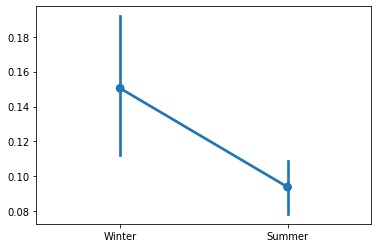

In [53]:
g1 = sns.pointplot(data=[single_hwinter['y_status'],
                        single_hsummer['y_status']], join=True)
                        
g1.set(xticklabels = ['Winter', 'Summer'])

In [54]:
single_hschool.pivot_table(values = 'y_status', index = 'housing', columns = 'month' )

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
housing,,,,,,,,,,
no,0.139535,0.089286,NaN,0.060976,0.071429,0.750000,0.089404,0.070588,0.307692,0.700000
unknown,1.000000,0.000000,1.0,0.000000,0.000000,NaN,0.052632,0.200000,NaN,NaN
yes,0.187500,0.176471,0.4,0.065934,0.129870,0.666667,0.057065,0.069565,0.500000,0.545455


In [55]:
single_hschool['housing'].value_counts()

yes        935
no         793
unknown     39
Name: housing, dtype: int64

In [56]:
married_hsummer = married_hschool[(married_hschool.month == 'may')|(married_hschool.month == 'jun')|(married_hschool.month ==
                                'jul')|(married_hschool.month == 'aug')|(married_hschool.month == 'sep')|
                               (single_hschool.month == 'oct')]
married_hwinter = married_hschool[(married_hschool.month == 'nov')|(married_hschool.month == 'dec')|(married_hschool.month ==
                                'jan')|(married_hschool.month == 'feb')|(married_hschool.month == 'mar')|
                               (married_hschool.month == 'apr')]

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
print("The Average Subscription rate of Married High School Educated in Summer: {:.2f}".format(married_hsummer['y_status'].mean())
)
print("The Average Subscription rate of Married High School Educated in Winter: {:.2f}".format(married_hwinter['y_status'].mean()))


The Average Subscription rate of Married High School Educated in Summer: 0.07
The Average Subscription rate of Married High School Educated in Winter: 0.10


In [58]:
stats.ttest_ind(married_hsummer['y_status'], married_hwinter['y_status'])

Ttest_indResult(statistic=-2.6701563545887166, pvalue=0.0076142068420220425)

#### Similar to Singles, Married people also have less subscription rates in Summer compared to Winter and the difference is significant from the t-test above

[[Text(0, 0, 'Winter'), Text(0, 0, 'Summer')]]

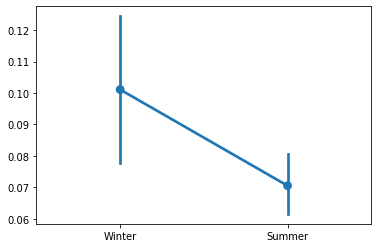

In [59]:
g2 = sns.pointplot(data=[married_hwinter['y_status'],
                        married_hsummer['y_status']], join=True)
                        
g2.set(xticklabels = ['Winter', 'Summer'])

In [60]:
print("The Average Subscription rate of Married High School Educated in Summer: {:.2f}".format(married_hsummer['y_status'].mean())
)
print("The Average Subscription rate of Single High School Educated in Summer: {:.2f}".format(single_hsummer['y_status'].mean()))


The Average Subscription rate of Married High School Educated in Summer: 0.07
The Average Subscription rate of Single High School Educated in Summer: 0.09


In [61]:
stats.ttest_ind(married_hsummer['y_status'], single_hsummer['y_status'])

Ttest_indResult(statistic=-2.726537131391165, pvalue=0.006424822310794557)

[[Text(0, 0, 'Married in Summer'), Text(0, 0, 'Single in Summer')]]

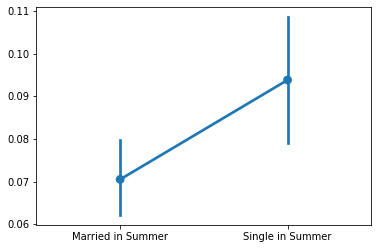

In [62]:
g3 = sns.pointplot(data=[married_hsummer['y_status'],
                        single_hsummer['y_status']], join=True)
                        
g3.set(xticklabels = ['Married in Summer', 'Single in Summer'])

In [63]:
print("The Average Subscription rate of Married High School Educated in Winter: {:.2f}".format(married_hwinter['y_status'].mean())
)
print("The Average Subscription rate of Single High School Educated in Winter: {:.2f}".format(single_hwinter['y_status'].mean()))


The Average Subscription rate of Married High School Educated in Winter: 0.10
The Average Subscription rate of Single High School Educated in Winter: 0.15


In [64]:
stats.ttest_ind(married_hwinter['y_status'], single_hwinter['y_status'])

Ttest_indResult(statistic=-2.28192860189695, pvalue=0.022707219189891728)

In [65]:
single_usummer = single_uni[(single_uni.month == 'may')|(single_uni.month == 'jun')|(single_uni.month ==
                                'jul')|(single_uni.month == 'aug')|(single_uni.month == 'sep')|
                               (single_uni.month == 'oct')]
single_uwinter = single_uni[(single_uni.month == 'nov')|(single_uni.month == 'dec')|(single_uni.month ==
                                'jan')|(single_uni.month == 'feb')|(single_uni.month == 'mar')|
                               (single_uni.month == 'apr')]

In [66]:
married_usummer = married_uni[(married_uni.month == 'may')|(married_uni.month == 'jun')|(married_uni.month ==
                                'jul')|(married_uni.month == 'aug')|(married_uni.month == 'sep')|
                               (married_uni.month == 'oct')]
married_uwinter = married_uni[(married_uni.month == 'nov')|(married_uni.month == 'dec')|(married_uni.month ==
                                'jan')|(married_uni.month == 'feb')|(married_uni.month == 'mar')|
                               (married_uni.month == 'apr')]

In [67]:
print("The Average Subscription rate of Married University Educated in Winter: {:.2f}".format(married_uwinter['y_status'].mean())
)
print("The Average Subscription rate of Married University Educated in Summer: {:.2f}".format(single_usummer['y_status'].mean()))


The Average Subscription rate of Married University Educated in Winter: 0.16
The Average Subscription rate of Married University Educated in Summer: 0.11


In [68]:
stats.ttest_ind(married_usummer['y_status'], married_uwinter['y_status'])

Ttest_indResult(statistic=-4.137169603304265, pvalue=3.577096090884124e-05)

[[Text(0, 0, 'Married in Summer'), Text(0, 0, 'Married in Winter')]]

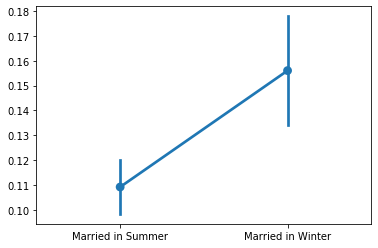

In [69]:
g4 = sns.pointplot(data=[married_usummer['y_status'],
                        married_uwinter['y_status']], join=True)
                        
g4.set(xticklabels = ['Married in Summer', 'Married in Winter'])

#### The subscriptions again are higher in Winter than in Summer, however, the p-value is not significant in this case

In [70]:
print("The Average Subscription rate of Married University Educated in Winter: {:.2f}".format(married_uwinter['y_status'].mean())
)
print("The Average Subscription rate of Single University Educated in Winter: {:.2f}".format(single_uwinter['y_status'].mean()))


The Average Subscription rate of Married University Educated in Winter: 0.16
The Average Subscription rate of Single University Educated in Winter: 0.21


In [71]:
stats.ttest_ind(married_uwinter['y_status'], single_uwinter['y_status'])

Ttest_indResult(statistic=-2.992779131917352, pvalue=0.002803943607442983)

[[Text(0, 0, 'Married in Winter'), Text(0, 0, 'Single in Winter')]]

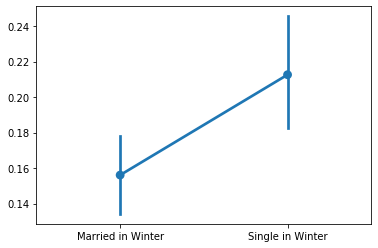

In [72]:
g5 = sns.pointplot(data=[married_uwinter['y_status'],
                        single_uwinter['y_status']], join=True)
                        
g5.set(xticklabels = ['Married in Winter', 'Single in Winter'])

In [73]:
print("The Average Subscription rate of Married University Educated in Summer: {:.2f}".format(married_usummer['y_status'].mean())
)
print("The Average Subscription rate of Single University Educated in Summer: {:.2f}".format(single_usummer['y_status'].mean()))


The Average Subscription rate of Married University Educated in Summer: 0.11
The Average Subscription rate of Single University Educated in Summer: 0.11


In [74]:
stats.ttest_ind(married_usummer['y_status'], single_usummer['y_status'])

Ttest_indResult(statistic=-0.4649008048821083, pvalue=0.6420191234301265)

#### Interestingly the University Educated Married and single groups have the same average subscription rates in summer months

In [75]:
## Looking into other variables like campaign calls and Duration accross various groups
print("The Average subscription rates of Married and Single groups for calls >5: {:.03f}".format(marital_age[marital_age['campaign'] >= 5]['y_status'].mean()))
print("The Average subscription rates of Married and Single groups for calls <5: {:.03f}".format(marital_age[marital_age['campaign'] < 5]['y_status'].mean()))

The Average subscription rates of Married and Single groups for calls >5: 0.054
The Average subscription rates of Married and Single groups for calls <5: 0.099


In [76]:
marital_age## Looking into other variables like campaign calls and Duration accross various groups
print("The Average subscription rates of Married and Single groups for calls >=3: {:.03f}".format(marital_age[marital_age['campaign'] >= 3]['y_status'].mean()))
print("The Average subscription rates of Married and Single groups for calls <3: {:.03f}".format(marital_age[marital_age['campaign'] < 3]['y_status'].mean()))

The Average subscription rates of Married and Single groups for calls >=3: 0.074
The Average subscription rates of Married and Single groups for calls <3: 0.103


In [77]:
marital_age## Looking into other variables like campaign calls and Duration accross various groups
print("The Average subscription rates of Married and Single groups for calls >3: {:.03f}".format(marital_age[marital_age['campaign'] > 3]['y_status'].mean()))
print("The Average subscription rates of Married and Single groups for calls <=3: {:.03f}".format(marital_age[marital_age['campaign'] <= 3]['y_status'].mean()))

The Average subscription rates of Married and Single groups for calls >3: 0.063
The Average subscription rates of Married and Single groups for calls <=3: 0.101


In [78]:
## Looking into other variables like campaign calls and Duration accross various groups
print("The Average subscription rates of Married and Single groups for calls >= 7: {:.03f}".format(marital_age[marital_age['campaign'] >= 7]['y_status'].mean()))
print("The Average subscription rates of Married and Single groups for calls < 7: {:.03f}".format(marital_age[marital_age['campaign'] < 7]['y_status'].mean()))

The Average subscription rates of Married and Single groups for calls >= 7: 0.040
The Average subscription rates of Married and Single groups for calls < 7: 0.097


In [79]:
callsg7 = marital_age[marital_age['campaign'] >= 7]
callsl7 = marital_age[marital_age['campaign'] < 7]

In [80]:
callsg5 = marital_age[marital_age['campaign'] >= 5]
callsl5 = marital_age[marital_age['campaign'] < 5]

In [81]:
callsg2 = marital_age[marital_age['campaign'] >= 3]
callsl3 = marital_age[marital_age['campaign'] < 3]

In [82]:
callsg3 = marital_age[marital_age['campaign'] > 3]
callsl3 = marital_age[marital_age['campaign'] <= 3]

[[Text(0, 0, 'Calls >= 5'), Text(0, 0, 'Calls < 5')]]

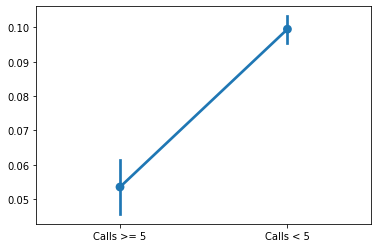

In [83]:
g6 = sns.pointplot(data=[callsg5['y_status'],
                        callsl5['y_status']], join=True)
                        
g6.set(xticklabels = ['Calls >= 5', 'Calls < 5'])

[[Text(0, 0, 'Calls >2'), Text(0, 0, 'Calls < 3')]]

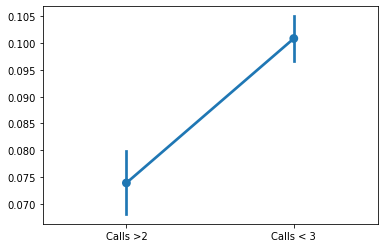

In [84]:
g7 = sns.pointplot(data=[callsg2['y_status'],
                        callsl3['y_status']], join=True)
                        
g7.set(xticklabels = ['Calls >2', 'Calls < 3'])

[[Text(0, 0, 'Calls >7'), Text(0, 0, 'Calls < 7')]]

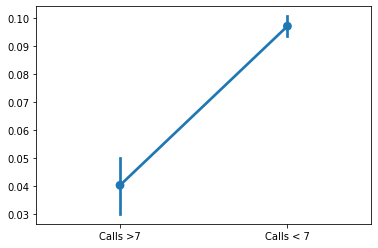

In [85]:
g7 = sns.pointplot(data=[callsg7['y_status'],
                        callsl7['y_status']], join=True)
                        
g7.set(xticklabels = ['Calls >7', 'Calls < 7'])

In [86]:
#stats.kruskal(calls_lessorequalto5['y_status'], calls_more_than_5['y_status'])

In [87]:
stats.kruskal(callsg3['y_status'], callsl3['y_status'])

KruskalResult(statistic=63.37696748536311, pvalue=1.7070234730338504e-15)

In [88]:
stats.kruskal(callsg2['y_status'], callsl3['y_status'])

KruskalResult(statistic=49.2375575360497, pvalue=2.2676715182205002e-12)

In [89]:
stats.kruskal(callsg5['y_status'], callsl5['y_status'])

KruskalResult(statistic=66.7920539874604, pvalue=3.017118226396262e-16)

In [90]:
stats.kruskal(callsg7['y_status'], callsl7['y_status'])

KruskalResult(statistic=52.45608858074512, pvalue=4.399768182045638e-13)

####  Comparing the above subscription rates for campaign calls, we can choose 5 as the cutoff for a better subscription rate

In [91]:
campaign_yes = marital_age[(marital_age['y_status'] == 1)]
campaign_no = marital_age[(marital_age['y_status'] == 0)]


(array([2.066e+03, 1.930e+02, 5.500e+01, 1.800e+01, 1.800e+01, 6.000e+00,
       0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]), array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]), <a list of 10 Patch objects>)
(array([2.1374e+04, 9.8900e+02, 2.7200e+02, 7.1000e+01, 4.0000e+01,
       2.1000e+01, 7.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00]), array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]), <a list of 10 Patch objects>)


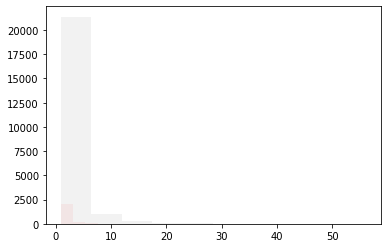

In [92]:
print(plt.hist(campaign_yes['campaign'], alpha = 0.05, color = 'red'))
print(plt.hist(campaign_no['campaign'], alpha = 0.05, color = 'black'))
plt.show()

In [93]:
stats.describe(campaign_yes['campaign'])

DescribeResult(nobs=2360, minmax=(1, 23), mean=2.083898305084746, variance=3.146836852731335, skewness=3.613162701620305, kurtosis=21.48406701984228)